# STATISTICAL ANALYSIS ON THE DIFFERENCE AMONG THE CHOLESTEROL LEVELS OF 2 BRANDS OF MARGARINE OVER 3 TIME POINTS

KARL ISAIAH BUENAFE | JAN EDWARD MACAGBA

In [180]:
import numpy as np
import scipy.stats as spt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM

In [141]:
cholesterol= pd.read_csv('FA10.csv')
cholesterol.head(10)

,ID,Before,After4weeks,After8weeks,Margarine
0,1,6.42,5.83,5.75,B
1,2,6.76,6.20,6.13,B
2,3,6.56,5.83,5.71,B
3,4,4.80,4.27,4.15,A
4,5,8.43,7.71,7.67,B
5,6,7.49,7.12,7.05,A
6,7,8.05,7.25,7.10,B
7,8,5.05,4.63,4.67,A
8,9,5.77,5.31,5.33,B
9,10,3.91,3.70,3.66,A


### ASSUMPTIONS

Assumption #1: You have a continuous dependent variable.

Assumption #2:  You have one between-subjects factor (i.e., independent variable) that is categorical with two or more categories.

Assumption #3: You have one within-subjects factor (i.e., independent variable) that is categorical with two or more categories.

Assumption #4: There should be no significant outliers in any level of the within-subjects factor.

Assumption #5: Your dependent variable should be approximately normally distributed for each level of the within-subjects factor.

Assumption #6: The variance of your dependent variable should be equal between the groups of the between-subjects factor.

Assumption #7: There should be homogeneity of covariances.

Assumption #8: The variance of the differences between groups should be equal.


### INTRODUCTION
This report discusses the data gathered from an experiment on whether the 2 brands of margarine had significant difference on cholesterol levels over 3 time periods.

NULL HYPOTHESIS  $(H_0)$ : There is no significant difference in the cholesterol levels between the two brands of margarine over the three time points.

 ALTERNATIVE HYPOTHESIS  $(H_1)$ : There's a significant difference between the 2 brands of margarine on cholesterol levels.

### METHODOLOGY

This analysis will first check if the dataset meets the assumptions needed in order to conduct a two-way ANOVA test. It will then be followed by checking for the normality using the Shapiro-Wilk Test. It will then be followed by the two-way ANOVA test to see if there's a significant difference between the effect on the cholesterol levels of the 2 treatment groups. An alternative treatment would be the Tukey’s Honest Significant Difference (HSD).

### RESULTS 

In [8]:
summary=cholesterol.describe()
summary=summary.drop(columns=['ID'])
summary

,Before,After4weeks,After8weeks
count,18.000000,18.000000,18.000000
mean,6.407778,5.841667,5.778889
std,1.191087,1.123352,1.101912
min,3.910000,3.700000,3.660000
25%,5.740000,5.175000,5.210000
50%,6.500000,5.830000,5.730000
75%,7.217500,6.730000,6.687500
max,8.430000,7.710000,7.670000


### Margarine A:

In [15]:
MargA=cholesterol[cholesterol['Margarine']=='A']
MargA.head()

,ID,Before,After4weeks,After8weeks,Margarine
3,4,4.80,4.27,4.15,A
5,6,7.49,7.12,7.05,A
7,8,5.05,4.63,4.67,A
9,10,3.91,3.70,3.66,A
12,13,6.17,5.56,5.51,A


### Margarine B:

In [14]:
MargB=cholesterol[cholesterol['Margarine']=='B']
MargB.head()

,ID,Before,After4weeks,After8weeks,Margarine
0,1,6.42,5.83,5.75,B
1,2,6.76,6.20,6.13,B
2,3,6.56,5.83,5.71,B
4,5,8.43,7.71,7.67,B
6,7,8.05,7.25,7.10,B


### Assumption #1: You have a continuous dependent variable.
Remark: The variables being measured is the cholesterol level which is continuous. Therefore, this assumption is met
### Assumption #2: You have one between-subjects factor (i.e., independent variable) that is categorical with two or more categories.
Remark: The group variable in the dataset are divided into 3 time periods which meets the assumption.
### Assumption #3: You have one within-subjects factor (i.e., independent variable) that is categorical with two or more categories.
Remark: The group variable in the dataset are divided into 2 subgroups (i.e. A and B) which meets the assumption.

### Assumption #4: There should be no significant outliers in any level of the within-subjects factor.

### Margarine A

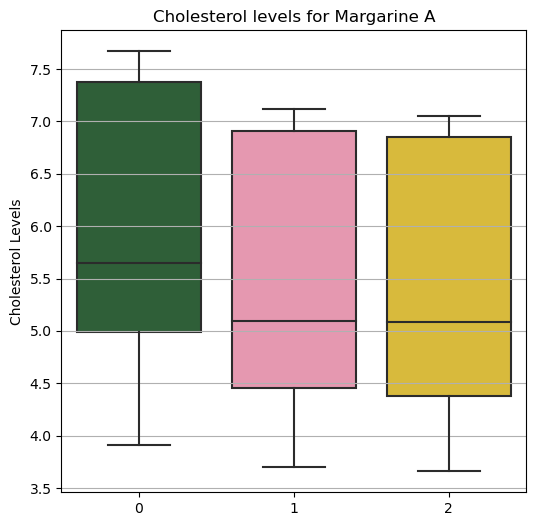

In [83]:
data = [MargA['Before'],MargA['After4weeks'],MargA['After8weeks']] 
labels = ['Before', 'After 4 Weeks', 'After 8 Weeks']

palette=["#276733",'#F28BAB', '#F2CA22']
plt.figure(figsize=(6, 6))
sns.boxplot(data=data, 
            palette=sns.set_palette(palette))

plt.title('Cholesterol levels for Margarine A')
plt.ylabel('Cholesterol Levels')
plt.grid(axis='y')

plt.show()


### Margarine B 

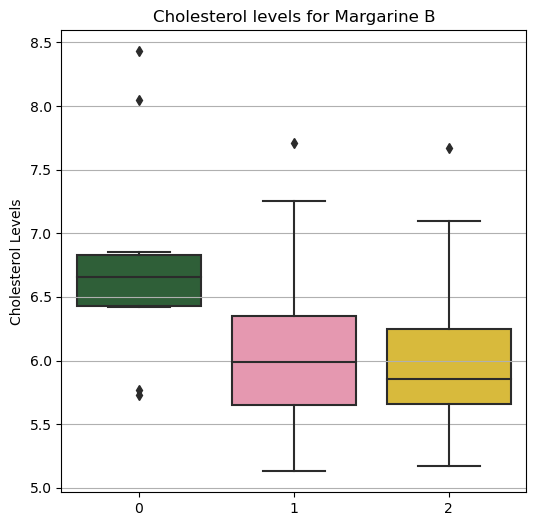

In [109]:
data = [MargB['Before'],MargB['After4weeks'],MargB['After8weeks']] 
labels = ['Before', 'After 4 Weeks', 'After 8 Weeks']

palette=["#276733",'#F28BAB', '#F2CA22']
plt.figure(figsize=(6, 6))
sns.boxplot(data=data, 
            palette=sns.set_palette(palette))

plt.title('Cholesterol levels for Margarine B')
plt.ylabel('Cholesterol Levels')
plt.grid(axis='y')

plt.show()


#### Remark: There's a significant number of outliers among the first time period of Margarine B but we can eliminate this by using the Interquartile Range (IQR).

#### Eliminating the outliers via IQR

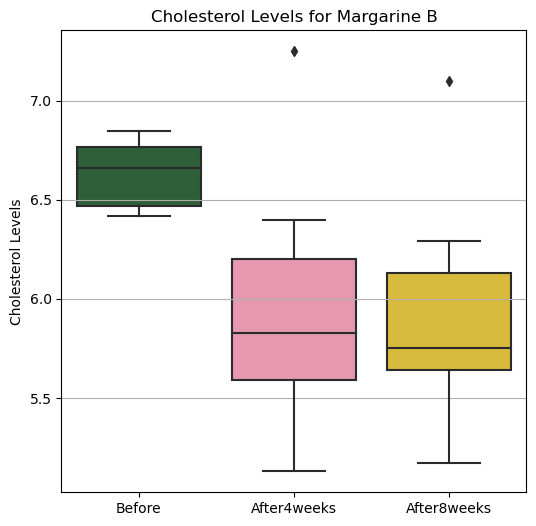

In [81]:
B = pd.DataFrame({
    'Before': MargB['Before'],
    'After4weeks': MargB['After4weeks'],
    'After8weeks': MargB['After8weeks']
})

df=B

def remove_outliers(df):
    filtered_columns = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
       
        filtered_columns[col] = df[col][(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return pd.DataFrame(filtered_columns)

# Remove outliers from the data
filtered_data = remove_outliers(df)

# Create boxplot
palette=["#276733",'#F28BAB', '#F2CA22']
plt.figure(figsize=(6, 6))
sns.boxplot(data=filtered_data, 
            palette=sns.set_palette(palette))
plt.title('Cholesterol Levels for Margarine B')
plt.ylabel('Cholesterol Levels')
plt.grid(axis='y')
plt.show()

### Assumption #5: Your dependent variable should be approximately normally distributed for each level of the within-subjects factor.

#### Shapiro-Wilk Test:

In [68]:
a, Sw_mab4= spt.shapiro(MargA['Before'])
b, Sw_maa4= spt.shapiro(MargA['After4weeks'])
c, Sw_maa8= spt.shapiro(MargA['After8weeks'])


d, Sw_mbb4= spt.shapiro(MargB['Before'])
e, Sw_mba4= spt.shapiro(MargB['After4weeks'])
f, Sw_mba8= spt.shapiro(MargB['After8weeks'])

df=[('Margarine A- Before', Sw_maa4),('Margarine A - After 4 weeks', Sw_maa4),('Margarine A - After 8 weeks', Sw_maa8),('Margarine B- Before', Sw_mba4),('Margarine B - After 4 weeks', Sw_mba4),('Margarine B - After 8 weeks', Sw_mba8)]
result=pd.DataFrame(df, columns=['Variable', 'p-value'])
result.head(6)

,Variable,p-value
0,Margarine A- Before,0.154353
1,Margarine A - After 4 weeks,0.154353
2,Margarine A - After 8 weeks,0.173832
3,Margarine B- Before,0.400042
4,Margarine B - After 4 weeks,0.400042
5,Margarine B - After 8 weeks,0.215876


Remark: based on the results of the Shapiro-Wilk test, it shows that the variable are normally distributed. Therefore, this met the assumption.

### Assumption #6: The variance of your dependent variable should be equal between the groups of the between-subjects factor.



To determine whether the variance between the groups of subjects is equal or not, we're going to use the Levene's Test

### Levene's Test on A and B

For this section, we're going to compute the variance across all time points for each brand followed by the comparison of variance of Brand A and Brand B

Variance comparison across each time points

### Brand A (Before, Ater 4 weeks, and After 8 weeks)

In [94]:
AB=MargA['Before']
A4=MargA['After4weeks']
A8=MargA['After8weeks']


stat, Amed_pvalue=spt.levene(AB, A4,A8, center='median')
stat, Amean_pvalue=spt.levene(AB, A4,A8, center='mean')

In [98]:
df=[('Median centered', Amed_pvalue), ('Mean centered', Amean_pvalue)]
ALev=pd.DataFrame(df, columns=['Levenes test', 'p-value'])
ALev

,Levenes test,p-value
0,Median centered,0.989676
1,Mean centered,0.985621


Remark: This table shows no significant difference among the cholesterol level across all time points for Brand A.

### Brand B (Before, Ater 4 weeks, and After 8 weeks)

In [99]:
BB=MargB['Before']
B4=MargB['After4weeks']
B8=MargB['After8weeks']


stat, Bmed_pvalue=spt.levene(BB, B4,B8, center='median')
stat, Bmean_pvalue=spt.levene(BB, B4,B8, center='mean')

In [101]:
df=[('Median centered', Bmed_pvalue), ('Mean centered', Bmean_pvalue)]
BLev=pd.DataFrame(df, columns=['Levenes test', 'p-value'])
BLev

,Levenes test,p-value
0,Median centered,0.980808
1,Mean centered,0.993928


Remark: This table shows no significant difference among the cholesterol level across all time points for Brand B.

#### With this we can say that the variance of across all time points of both Brand A and Brand B are equal. Therefore, it meets the assumption.

### Assumption #7: There should be homogeneity of covariances.

In [117]:
A={'Before':AB, 'After 4 weeks': A4, 'After 8 weeks':A8}

A_df=pd.DataFrame(A)

A_cov= A_df[['Before', 'After 4 weeks', 'After 8 weeks']].cov()
A_cov

,Before,After 4 weeks,After 8 weeks
Before,2.039543,1.973093,1.949379
After 4 weeks,1.973093,1.925441,1.904541
After 8 weeks,1.949379,1.904541,1.887070


Remark: This matrix shows that the homogeneity of covariances is violated. Therefore, we will resort to an alternative test

### Friedman Test

In [128]:
stat, ft_pvalue= spt.friedmanchisquare(A_df['Before'], A_df['After 4 weeks'], A_df['After 8 weeks'])
result={'Friedman Stat score':[stat],'p-value':[ft_pvalue]}
ft=pd.DataFrame(result)
ft.head()

,Friedman Stat score,p-value
0,14.25,0.000805


Remark: Using an the Friedman test, we got a p-value that would show the homogeneity of covariances. From here, the assumption was met.

### Assumption #8: The variance of the differences between groups should be equal.

In [177]:
group_A=fdf[fdf['Brand'] == 'A']['Cholesterol']
group_B=fdf[fdf['Brand'] == 'B']['Cholesterol']

stat, pvalue=spt.levene(group_A,group_B)
pvalue

0.002079404214255124

Remark: Since all assumptions are met, we can now run two-way ANOVA

### Two-way ANOVA:

In [182]:
df_transp = pd.DataFrame({
    'Subject': Cholesterol['ID'],
    'Brand': Cholesterol['Margarine'],
    'Before': Cholesterol['Before'],
    'After 4 Weeks': Cholesterol['After4weeks'],
    'After 8 Weeks': Cholesterol['After8weeks']
})


fdf = df_transp.melt(id_vars=['Subject', 'Brand'], 
                     value_vars=['Before', 'After 4 Weeks', 'After 8 Weeks'],
                     var_name='Time', 
                     value_name='Cholesterol')

model = ols('Cholesterol ~ C(Brand) + C(Time) + C(Brand):C(Time)', data=fdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2) 
print(anova_table)

                     sum_sq    df         F    PR(>F)
C(Brand)           6.979363   1.0  5.663479  0.021343
C(Time)            4.319544   2.0  1.752570  0.184237
C(Brand):C(Time)   0.079991   2.0  0.032455  0.968088
Residual          59.152585  48.0       NaN       NaN


## DISCUSSION

Based on the results of the two-way ANOVA, we interpreted the following:
1. The brand of the margarine made a significant difference on the cholesterol levels
2. Time did not make a significant difference on the cholesterol levels
3. The interaction between Brand and Time did not make a significant difference on the cholesterol levels.

## CONCLUSION

After conducting this statistical analysis, the results returned with a suggestion, which is that there is a significant difference on the cholesterol levels with respect to the brand of the margarine. Therefore, we must REJECT THE NULL HYPOTHESIS $(H_0)$.